# Feature Engineering
## 3.1. Sentiment Analysis of our user's reviews
Conducting sentiment analysis on the reviews column involves several steps. Here's a basic outline of the process:

1. **Preprocessing**: This step involves cleaning and preparing the text data for analysis. It may include tasks such as removing punctuation, converting text to lowercase, removing stop words, and handling special characters.

2. **Tokenization**: Tokenization involves breaking down the text into individual words or tokens. This step is essential for further analysis.

3. **Sentiment Analysis**: Once the text data is prepared, sentiment analysis can be performed. There are several libraries and techniques available for sentiment analysis, including lexicon-based approaches, machine learning models, and deep learning models.

4. **Analysis and Visualization**: Finally, the results of the sentiment analysis can be analyzed and visualized to gain insights from the data.

We import the libraries we will be needing for the assignment

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect

### We load the data into a pandas df

In [38]:
# Define the file path for the Parquet file
reviews = 'data/reviews.parquet'

# Read the Parquet file into a pandas DataFrame
df_reviews = pd.read_parquet(reviews)

### 1. Preprocessing
We'll start by cleaning and preparing the text data.<br>

In [39]:
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flore\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2: Sentiment Analysis
For sentiment analysis, we can use the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon, which is available in the NLTK library.

In [40]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

def has_emoji(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    # Check if the text contains emojis
    return bool(emoji_pattern.search(text))

def analyze_sentiment(text):
    # Check if text is empty or None
    if not text:
        return 1  # Neutral
    
    # Check if text contains "10/10"
    if "10/10" in text:
        return 2  # Positive
    
    # Check if text contains emojis
    if has_emoji(text):
        return 1  # Neutral
    
    # Check if text is in English
    try:
        language = detect(text)
        if language != 'en':
            return 1  # Neutral
    except:
        pass  # If language detection fails, continue
    
    # Get the polarity scores
    sentiment_scores = sid.polarity_scores(text)
    
    # Determine the sentiment label based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        return 2  # Positive
    elif sentiment_scores['compound'] <= -0.05:
        return 0  # Negative
    else:
        return 1  # Neutral

The compound score in VADER (Valence Aware Dictionary and sEntiment Reasoner) is a metric that represents the overall sentiment polarity of a piece of text. It's a single value that combines the scores of individual words in the text to provide an overall sentiment score.

Here's how it's calculated:

For each word in the text, VADER assigns a polarity score ranging from -1 (extremely negative) to +1 (extremely positive).
The compound score is then computed by summing the polarity scores of all the words in the text and normalizing the result to a range between -1 and +1.
So, a compound score of:
<br>

-   Greater than or equal to 0.05 is considered **positive**.
-   Less than or equal to -0.05 is considered **negative**.
-   Between -0.05 and 0.05 (inclusive) is considered **neutral**.
<br>

The sentiment label is determined based on these compound score thresholds. <br>
If the compound score is above 0.05, it's classified as positive.<br> 
If it's below -0.05, it's classified as negative.<br> 
Otherwise, it's classified as neutral.<br>

### 3: Applying Preprocessing and Sentiment Analysis to the Reviews Column
We'll apply the preprocessing function to clean the text data and then apply sentiment analysis to each review

In [41]:
# Apply preprocessing to the 'reviews' column
df_reviews['clean_reviews'] = df_reviews['review_text'].apply(preprocess_text)

# Apply sentiment analysis to the cleaned reviews
df_reviews['sentiment'] = df_reviews['clean_reviews'].apply(analyze_sentiment)

In [42]:
df_reviews.head()

,user_id,user_url,item_id,helpful,recommend,review_text,date,year,clean_reviews,sentiment
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011-11-05,2011,simple yet great replayability opinion zombie ...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,No ratings yet,True,It's unique and worth a playthrough.,2011-07-15,2011,unique worth playthrough,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011-04-21,2011,great atmosphere gunplay bit chunky times end ...,2
3,js41637,http://steamcommunity.com/id/js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014-06-24,2014,know think see title barbie dreamhouse party i...,2
4,js41637,http://steamcommunity.com/id/js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013-09-08,2013,simple actually simple truck driving simulator...,2


### 4: Analysis and Visualization
Finally, we can analyze the sentiment distribution and visualize the results.

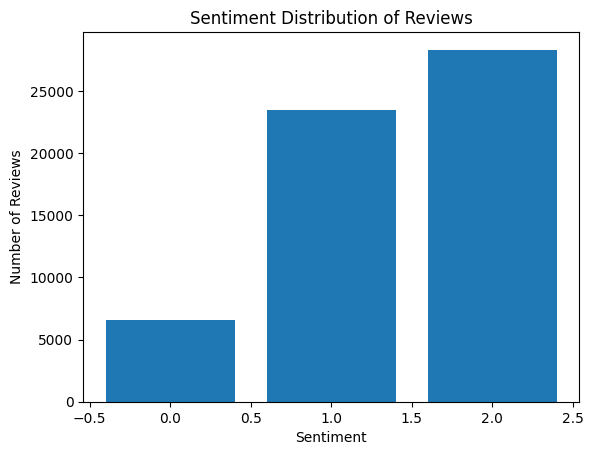

In [43]:
# Count the number of reviews for each sentiment
sentiment_counts = df_reviews['sentiment'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution of Reviews')
plt.show()

### 5. Validation of the sentiment Analysis
We will review how the model has classified some of the reviews to validate that the Sentiment Analysis is as requested

In [44]:
df_negatives = df_reviews[df_reviews['sentiment'] == 0] 
df_positive = df_reviews[df_reviews['sentiment'] == 2] 
df_neutral = df_reviews[df_reviews['sentiment'] == 1] 

In [45]:
rows = 15001
field1 = df_positive.iloc[rows]['review_text']  # Access the value of the first field
field2 = df_positive.iloc[rows]['sentiment']  # Access the value of the second field
print("Review:", field1)
print("Sentiment:", field2)

Review: The only fighting game I can think of that is better than this one is Super Street Fighter II Turbo. Love fighting games? Pick this one up. Do play with a Pad/Arcade Stick though. You won't have much fun using the keyboard.
Sentiment: 2


This above example shows that the sentiment analysis conducted is indeed correclty classifying reviews

In [46]:
rows = 2054
field3 = df_negatives.iloc[rows]['review_text']  # Access the value of the first field
field4 = df_negatives.iloc[rows]['sentiment']  # Access the value of the second field
print("Review:", field3)
print("Sentiment:", field4)

Review: Good game. Has two diverse teams (Kharaa or the Frontiersman), offers the choice of fighting the opposing team as either an FPS or an RTS. Has challenging gameplay, with multiple weapons and armours to suit your playstyle, as either a large mech suit, to a lowly scout soldier armed with mines. 8.5/10
Sentiment: 0


Again, this above example validates that the model is correctly identifying sentiments in the reviews.

In [53]:
rows = 3634
field5 = df_neutral.iloc[rows]['review_text']  # Access the value of the first field
field6 = df_neutral.iloc[rows]['sentiment']  # Access the value of the second field
print("Review:", field5)
print("Sentiment:", field6)

Review: Very good and amzing
Sentiment: 1


As you can see from the above comment, the model is not so good at predicting neutral reviews. After many attempts to improve the neutral classification the code grows more complex but the results do not improve that much.<br>
Finally, deciding on a more simpler course of action is best, it does not consume that many resources and time and it gets a result quite similar but with a much simpler approach and a much leaner model. 

In [54]:
percent_positives = df_positive['user_id'].count()/df_reviews['user_id'].count()
percent_negatives = df_negatives['user_id'].count()/df_reviews['user_id'].count()
percent_neutral = df_neutral['user_id'].count()/df_reviews['user_id'].count()

print('Final Classification results:')
print('_____________________________')
print('Positive classifications', df_positive['user_id'].count(),' and ', round(percent_positives,2)*100,'%')
print('Negative classifications', df_negatives['user_id'].count(), ' and ', round(percent_negatives,2)*100,'%')
print('Neutral classifications', df_neutral['user_id'].count(), ' and ', round(percent_neutral,2)*100,'%')

Final Classification results:
_____________________________
Positive classifications 28331  and  49.0 %
Negative classifications 6614  and  11.0 %
Neutral classifications 23455  and  40.0 %


### After several attempts we decided to do the sentiment Analysis in the simpler solution, we add a new column with the more simpler model using Textblob library in python

In [55]:
from textblob import TextBlob

def analyze_sentiment_with_textblob(text):
    # Check if the text contains '10/10'
    if '10/10' in text:
        return 2 # Positive
    
    # Check if the text is empty or None
    if not text.strip():
        return 1 # Neutral 
    
    # Check if text contains emojis
    if has_emoji(text):
        return 1  # Neutral
    
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the polarity score
    polarity = blob.sentiment.polarity
    
    # Determine the sentiment label based on the polarity score
    if polarity > 0 :
        return 2 # Positive
    elif polarity < 0 :
        return 0 # Negative
    else:
        return 1 # neutral

In [56]:
# Apply sentiment analysis to the cleaned reviews with textblob instead of nltk library and Vader method

df_reviews['sentiment_textblob'] = df_reviews['clean_reviews'].apply(analyze_sentiment_with_textblob)

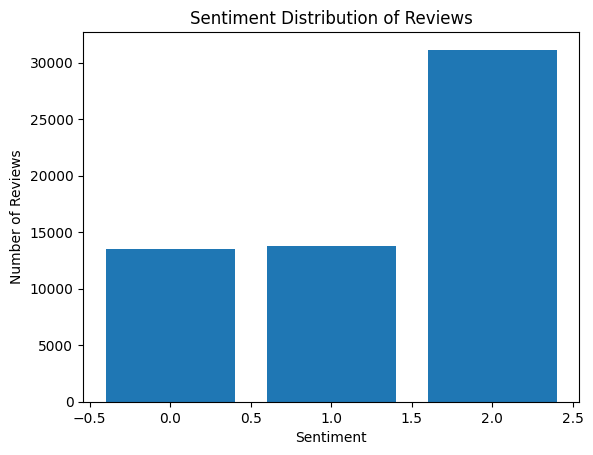

In [57]:
# Count the number of reviews for each sentiment
sentiment_counts_txt = df_reviews['sentiment_textblob'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts_txt.index, sentiment_counts_txt.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution of Reviews')
plt.show()

In [58]:
df_negatives_txt = df_reviews[df_reviews['sentiment_textblob'] == 0] 
df_positive_txt = df_reviews[df_reviews['sentiment_textblob'] == 2] 
df_neutral_txt = df_reviews[df_reviews['sentiment_textblob'] == 1] 

In [59]:
percent_positives = df_positive_txt['user_id'].count()/df_reviews['user_id'].count()
percent_negatives = df_negatives_txt['user_id'].count()/df_reviews['user_id'].count()
percent_neutral = df_neutral_txt['user_id'].count()/df_reviews['user_id'].count()

print('Final Classification results:')
print('_____________________________')
print('Positive classifications', df_positive_txt['user_id'].count(),' and ', round(percent_positives,2)*100,'%')
print('Negative classifications', df_negatives_txt['user_id'].count(), ' and ', round(percent_negatives,2)*100,'%')
print('Neutral classifications', df_neutral_txt['user_id'].count(), ' and ', round(percent_neutral,2)*100,'%')

Final Classification results:
_____________________________
Positive classifications 31148  and  53.0 %
Negative classifications 13499  and  23.0 %
Neutral classifications 13753  and  24.0 %


### We can now drop the column review_txt and keep just the column sentiment, we are going to keep the sentimet obtain by the complex model using python nltk libraries
Allthough more complex, and more complete, this library's output on detecting the positive and negative outcome was more assertive and for neutrals as well.
We will keep both analysis and compare them in the EDA process.

In [60]:
df_reviews.drop(['clean_reviews','review_text'], axis=1,inplace=True)

In [61]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58400 entries, 0 to 58399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             58400 non-null  object        
 1   user_url            58400 non-null  object        
 2   item_id             58400 non-null  int64         
 3   helpful             58400 non-null  object        
 4   recommend           58400 non-null  bool          
 5   date                58400 non-null  datetime64[ns]
 6   year                58400 non-null  int32         
 7   sentiment           58400 non-null  int64         
 8   sentiment_textblob  58400 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 3.4+ MB


### We store the transformed data in a parquet file for optimum space storage

In [62]:
# Define the file path for storing the Parquet file
reviews = 'data/reviews.parquet'

# Store the DataFrame as a Parquet file
df_reviews.to_parquet(reviews, index=False)

# Print a message confirming the storage location
print(f'reviews DataFrame was stored into {reviews}')

reviews DataFrame was stored into data/reviews.parquet


# 3.2 API Functions 
In this section of our notebook we are going to experiment and work on our requested API Functions.<br>
These are:<br>
1. **Developer** number of games and percentage of Free content by developer by year.<br>
2. **User_data**: how much money has the user spent, what percentage, from the total number of games the user owns, has the user recommended from the reviews.recommend and how many games he purchased.<br>
3. **User_for_genres**: this function must return the user with the largest amount of minutes for the given genres and a list of minutes accumulated per year since the release date<br>
4. **Best_developer_year**: this function returns the top 3 developers based on the largest amount of recommendations for the given year (reviews.recommend = True and sentiment = 2)<br>
5. **Developer_Reviews_Analyis**: given a developer, the function returns a dicctionary with developer as keys and the amount of Positive and Negative Sentiment Reviews.<br> 

In [2]:
# Define the file path for the Parquet file
games = 'data/RS_games.parquet'
reviews = 'data/RS_reviews.parquet'
items = 'data/items.parquet'

# Read the Parquet file into a pandas DataFrame
df_games = pd.read_parquet(games)
df_reviews = pd.read_parquet(reviews)   
df_items = pd.read_parquet(items)


## 3.2.1 **Developer** number of games and percentage of Free content by developer by year
We'need to create a dataframe listing each game developer alongside their developed items, including the release year and respective prices.

In [62]:
df_developer = df_games.copy()

In [63]:
df_developer.drop(['item_name','publisher','genres', 'action', 'adventure', 'animation modeling',
       'audio production', 'casual', 'design illustration', 'early access',
       'education', 'free to play', 'indie', 'massively multiplayer',
       'photo editing', 'racing', 'rpg', 'simulation', 'software training',
       'sports', 'strategy', 'utilities', 'video production', 'web publishing',
       'clean_title'],axis=1, inplace= True)

In [252]:
df_developer['developer'].value_counts().head(10)

developer
Dovetail Games                                                           253
KOEI TECMO GAMES CO., LTD.                                               180
Ubisoft - San Francisco                                                  178
Capcom                                                                   107
Paradox Development Studio                                                97
Stainless Games                                                           83
DL Softworks                                                              78
Relic Entertainment,Feral Interactive (Mac),Feral Interactive (Linux)     77
Choice of Games                                                           76
SCS Software                                                              73
Name: count, dtype: int64

#### Creating the Developer Function

In [253]:
# Filter the developer DataFrame by the given developer name
developer_name = 'Dovetail Games'
developer_df = df_developer[df_developer['developer'] == developer_name]
developer_df

,item_id,developer,release_year,price
169,256611,Dovetail Games,2009,4.99
170,256576,Dovetail Games,2009,4.99
271,208306,Dovetail Games,2009,17.99
273,208300,Dovetail Games,2009,19.99
404,24075,Dovetail Games,2010,4.99
...,...,...,...,...
21829,24096,Dovetail Games,2010,12.99
21855,24095,Dovetail Games,2013,8.99
21941,24070,Dovetail Games,2010,8.99
22116,24012,Dovetail Games,2009,7.99


In [254]:
# Group the filtered DataFrame by release year and count the number of items per year
year_counts = developer_df.groupby('release_year')['item_id'].count().reset_index()
year_counts.columns = ['Year', 'Games Quantity']

In [255]:
year_counts

,Year,Games Quantity
0,2009,22
1,2010,4
2,2011,4
3,2012,52
4,2013,39
5,2014,37
6,2015,50
7,2016,21
8,2017,24


In [256]:
# Calculate the total number of items developed by the developer
total_items = year_counts['Games Quantity'].sum()
total_items

253

In [257]:
# Calculate the number of free items (price equals zero) per year
free_items = developer_df[developer_df['price'] == 0].groupby('release_year')['item_id'].count().reset_index()
free_items.columns = ['Year', 'Free Items']
free_items

,Year,Free Items
0,2017,1


In [258]:
# Merge the two DataFrames on release year
summary_df = pd.merge(year_counts, free_items, on='Year', how='left')
summary_df

,Year,Games Quantity,Free Items
0,2009,22,NaN
1,2010,4,NaN
2,2011,4,NaN
3,2012,52,NaN
4,2013,39,NaN
5,2014,37,NaN
6,2015,50,NaN
7,2016,21,NaN
8,2017,24,1.0


In [259]:
# Calculate the percentage of free items for each year
summary_df['Free Content (%)'] = (summary_df['Free Items'] / summary_df['Games Quantity']) * 100
summary_df['Free Content (%)']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8    4.166667
Name: Free Content (%), dtype: float64

In [260]:
# Fill missing values (years with no free items) with zero
summary_df['Free Items'] = summary_df['Free Items'].fillna(0)
summary_df['Free Content (%)'] = summary_df['Free Content (%)'].fillna(0)
summary_df['Free Content (%)']

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    4.166667
Name: Free Content (%), dtype: float64

In [261]:
summary_df

,Year,Games Quantity,Free Items,Free Content (%)
0,2009,22,0.0,0.000000
1,2010,4,0.0,0.000000
2,2011,4,0.0,0.000000
3,2012,52,0.0,0.000000
4,2013,39,0.0,0.000000
5,2014,37,0.0,0.000000
6,2015,50,0.0,0.000000
7,2016,21,0.0,0.000000
8,2017,24,1.0,4.166667


In [262]:
developers_ok = df_games['developer'].unique()
developers_ok

array(['Kotoshiro', 'Secret Level SRL', 'Poolians.com', ...,
       'Oscar Ortigueira López,OrtiGames/OrtiSoft', 'INGAME',
       'Bidoniera Games'], dtype=object)

In [263]:
len(developers_ok)

10275

In [264]:
df_developer = df_games.copy()

### Now we put all this into a Function<br>

In [64]:
from fastapi import HTTPException

def developer(developer_name):
    # Create a copy of df_games
    df_developer = pd.read_parquet('data/developers.parquet')

    # Check if the provided developer_name exists in the DataFrame
    if developer_name not in df_developer['developer'].unique():
        print(f"Developer {developer_name} not found.")

    else:    # Drop unnecessary columns
        # Filter the developer DataFrame by the given developer name
        developer_df = df_developer[df_developer['developer'] == developer_name]
        
        # Group the filtered DataFrame by release year and count the number of items per year
        year_counts = developer_df.groupby('release_year')['item_id'].count().reset_index()
        year_counts.columns = ['Year', 'Games Quantity']
        
        # Calculate the total number of items developed by the developer
        total_items = year_counts['Games Quantity'].sum()
        
        # Calculate the number of free items (price equals zero) per year
        free_items = developer_df[developer_df['price'] == 0].groupby('release_year')['item_id'].count().reset_index()
        free_items.columns = ['Year', 'Free Items']
        
        # Merge the two DataFrames on release year
        summary_df = pd.merge(year_counts, free_items, on='Year', how='left')
        
        # Calculate the percentage of free items for each year
        summary_df['Free Content (%)'] = (summary_df['Free Items'] / summary_df['Games Quantity']) * 100
        
        # Fill missing values (years with no free items) with zero
        summary_df['Free Items'] = summary_df['Free Items'].fillna(0)
        summary_df['Free Content (%)'] = summary_df['Free Content (%)'].fillna(0)
        
        return summary_df

In [65]:
developer('shiro')

UnboundLocalError: cannot access local variable 'df_developer' where it is not associated with a value

In [159]:
developer('Kotoshiro')

,Year,Games Quantity,Free Items,Free Content (%)
0,2018,1,0.0,0.0


## 3.2.2 **User_data**: how much money has the user spent, what percentage, from the total number of games the user owns, has the user recommended from the reviews.recommend and how many games he purchased.<br>

In [91]:
# 3.2.2 **User_data**: how much money has the user spent, what percentage, from the total number of games the user owns, 
# has the user recommended from the reviews.recommend and how many games he purchased.<br>
df_user_items = df_items.copy()
df_user_items.drop(['item_name','playtime_forever','playtime_2weeks'],axis=1, inplace= True)

#### We are going to complete the user_items df with price from games

In [92]:
df_user_items = df_user_items.merge(df_games[['item_id', 'price']], on='item_id', how='left')
df_user_items.head(2)

,user_id,item_id,price
0,76561197970982479,10,9.99
1,76561197970982479,20,4.99


### Now we merge the df_reviews with user_items to create a new column recommend

In [93]:
df_user_items = df_user_items.merge(df_reviews[['user_id', 'item_id', 'recommend']], on=['user_id', 'item_id'], how='left')

In [94]:
df_user_items.columns

Index(['user_id', 'item_id', 'price', 'recommend'], dtype='object')

### Now that we have our dataframe, we work on our Function

In [164]:
user_id = 'maplemage'

In [165]:
# Filter user items by user_id
df_user_id_items = df_user_items[df_user_items['user_id'] == user_id]
df_user_id_items

,user_id,item_id,price,recommend
3104,maplemage,240,19.99,NaN
3105,maplemage,300,9.99,NaN
3106,maplemage,320,4.99,NaN
3107,maplemage,340,NaN,NaN
3108,maplemage,1200,9.99,NaN
...,...,...,...,...
3728,maplemage,207140,14.99,NaN
3729,maplemage,369200,NaN,NaN
3730,maplemage,485890,0.99,NaN
3731,maplemage,214850,NaN,NaN


In [166]:
# Calculate total money spent
money_spent = df_user_id_items['price'].sum()
money_spent

7078.42

In [167]:
# Calculate recommend percentage
recommend_percentage = round((df_user_id_items['recommend'].sum() / len(df_user_id_items)),4) * 100
recommend_percentage

0.64

In [168]:
# Calculate game quantity
game_quantity = len(df_user_id_items)
game_quantity

629

In [169]:
result = {
    'User_Id': f'{user_id}',
    'Money Spent': f'{money_spent:.2f} USD',
    'Recommend Percentage': f'{recommend_percentage:.2f}%',
    'Game Quantity': game_quantity}
result

{'User_Id': 'maplemage',
 'Money Spent': '7078.42 USD',
 'Recommend Percentage': '0.64%',
 'Game Quantity': 629}

In [115]:
df_items_users = df_items.copy()
df_items_users.drop(['item_name','playtime_forever','playtime_2weeks'],axis=1, inplace= True)
df_items_users

,user_id,item_id
0,76561197970982479,10
1,76561197970982479,20
2,76561197970982479,30
3,76561197970982479,40
4,76561197970982479,50
...,...,...
5094077,76561198329548331,346330
5094078,76561198329548331,373330
5094079,76561198329548331,388490
5094080,76561198329548331,521570


In [101]:
user_id = '76561198070585472'
df_items_users = df_user_items[df_items_users['user_id'] == user_id]
df_items_users

,user_id,item_id
2547594,76561198070585472,1200
2547595,76561198070585472,1230
2547596,76561198070585472,1280
2547597,76561198070585472,3920
2547598,76561198070585472,4000
...,...,...
2552045,76561198070585472,515910
2552046,76561198070585472,516230
2552047,76561198070585472,517790
2552048,76561198070585472,517810


In [123]:
df_items_users = pd.read_parquet('data/items_users.parquet')

def user_data(user_id):
    # Filter user items by user_id
    df_user_id_items = df_items_users[df_items_users['user_id'] == user_id]

    # Merge with df_games to add price
    df_user_id_items = df_user_id_items.merge(df_games[['item_id', 'price']], on='item_id', how='left')
    df_user_id_items['price'] = df_user_id_items['price'].fillna(0)
    
    # Merge with df_reviews to add recommend
    df_user_id_items = df_user_id_items.merge(df_reviews[['user_id', 'item_id', 'recommend']], on=['user_id', 'item_id'], how='left')
    df_user_id_items['recommend'] = df_user_id_items['recommend'].fillna(0)
    
    # Calculate total money spent
    money_spent = df_user_id_items['price'].sum()

    # Calculate recommend percentage
    recommend_percentage = round((df_user_id_items['recommend'].sum() / len(df_user_id_items)), 4) * 100

    # Calculate game quantity
    game_quantity = len(df_user_id_items)

    result = {
        'User_Id': f'{user_id}',
        'Money Spent': f'{money_spent:.2f} USD',
        'Recommend Percentage': f'{recommend_percentage:.2f}%',
        'Game Quantity': game_quantity}
    return result

In [124]:
user_data('76561198070585472')

{'User_Id': '76561198070585472',
 'Money Spent': '30969.63 USD',
 'Recommend Percentage': '0.13%',
 'Game Quantity': 4456}

### Function user_data
We put all this together to create a function  

In [170]:
def user_data(user_id):
    # Filter user items by user_id
    user_id_items = df_user_items[df_user_items['user_id'] == user_id]
    
    # Calculate total money spent
    money_spent = user_id_items['price'].sum()
    
    # Calculate recommend percentage
    recommend_percentage = (user_id_items['recommend'].sum() / len(user_id_items)) * 100
    
    # Calculate game quantity
    game_quantity = len(user_id_items)
    
    # Create dictionary with summary information
    result = {
        'User_Id': f'{user_id}',
        'Money Spent': f'{money_spent:.2f} USD',
        'Recommend Percentage': f'{recommend_percentage:.2f}%',
        'Game Quantity': game_quantity
    }
    
    return result

In [171]:
user_data('76561197970982479')

{'User_Id': '76561197970982479',
 'Money Spent': '3364.37 USD',
 'Recommend Percentage': '1.08%',
 'Game Quantity': 277}

In [172]:
user_data('js41637')

{'User_Id': 'js41637',
 'Money Spent': '8252.55 USD',
 'Recommend Percentage': '0.34%',
 'Game Quantity': 888}

In [291]:
user_data('piepai')

{'User_Id': 'piepai',
 'Money Spent': '47347.78 USD',
 'Recommend Percentage': '0.02%',
 'Game Quantity': 6132}

## 3.2.3 **User_for_genres**: this function must return the user with more minutes accumulated for the given genres and a list of minutes accumulated per year since the release date<br>

In [16]:
df_user_id_genres = df_items[['user_id','item_id','playtime_forever']].copy()
df_user_id_genres.head()

,user_id,item_id,playtime_forever
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7
3,76561197970982479,40,0
4,76561197970982479,50,0


In [30]:
df_games.columns

Index(['item_id', 'item_name', 'developer', 'publisher', 'release_year',
       'price', 'genres', 'action', 'adventure', 'animation modeling',
       'audio production', 'casual', 'design illustration', 'early access',
       'education', 'free to play', 'indie', 'massively multiplayer',
       'photo editing', 'racing', 'rpg', 'simulation', 'software training',
       'sports', 'strategy', 'utilities', 'video production', 'web publishing',
       'clean_title'],
      dtype='object')

#### Now we merge user_id_genres with df_games2 to bring the genres column 

In [7]:
# I will merge interactively the df_user_id_genres by each genre the function requests
genre = 'casual'
df_user_id_genres = df_user_id_genres.merge(df_games[['item_id', genre,'release_year']], on='item_id', how='left')

In [8]:
df_user_id_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094082 entries, 0 to 5094081
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   item_id           int64  
 2   playtime_forever  int64  
 3   casual            float64
 4   release_year      Int64  
dtypes: Int64(1), float64(1), int64(2), object(1)
memory usage: 199.2+ MB


In [32]:
df_user_id_genres.columns

Index(['user_id', 'item_id', 'playtime_forever', 'action', 'release_year'], dtype='object')

In [9]:
nan_counts_per_column = df_user_id_genres.isna().sum()
nan_counts_per_column

user_id                   0
item_id                   0
playtime_forever          0
casual              1101145
release_year        1124888
dtype: int64

In [16]:
df_user_id_genres.dropna(inplace=True)

In [34]:
# We filter all items that don't belong to genre 
df_user_id_genres = df_user_id_genres[df_user_id_genres[genre] == 1]

In [36]:
# Group by user_id and release_year and sum playtime_forever
grouped_year = df_user_id_genres.groupby(['user_id', 'release_year'])['playtime_forever'].sum().reset_index()
grouped_year

,user_id,release_year,playtime_forever
0,--000--,2009,5329
1,--000--,2010,22
2,--000--,2011,6522
3,--000--,2012,109346
4,--000--,2013,363
...,...,...,...
668425,zzzmidmiss,2010,273
668426,zzzmidmiss,2011,2302
668427,zzzmidmiss,2012,5714
668428,zzzmidmiss,2013,98


In [37]:
# Group by user_id and sum playtime_forever to find the user_id with more accumulated hours
grouped_sum = df_user_id_genres.groupby(['user_id'])['playtime_forever'].sum().reset_index()
grouped_sum

,user_id,playtime_forever
0,--000--,139469
1,--ace--,69308
2,--ionex--,38300
3,-2SV-vuLB-Kg,42500
4,-404PageNotFound-,116783
...,...,...
67695,zzonci,0
67696,zzoptimuszz,74307
67697,zzydrax,1194
67698,zzyfo,16512


In [38]:
# Find the user with the highest accumulated playtime
max_user = grouped_sum.loc[grouped_sum['playtime_forever'].idxmax()]
max_user

user_id             Sp3ctre
playtime_forever    1635566
Name: 50550, dtype: object

In [39]:
# Get the accumulated playtime per year for the user with the highest accumulated playtime
max_user_id = max_user['user_id']
max_user_playtime = grouped_year[grouped_year['user_id'] == max_user_id].set_index('release_year')['playtime_forever'] / 60  # Convert minutes to hours

In [40]:
# Convert playtime to integer hours
max_user_playtime = max_user_playtime.round().astype(int)
max_user_playtime.head()

release_year
1993    0
1995    4
1996    0
1998    0
1999    1
Name: playtime_forever, dtype: int32

In [41]:
# Create a list of dictionaries containing the playtime per year
playtime_per_year = [{year: hours} for year, hours in max_user_playtime.items()]
playtime_per_year

[{1993: 0},
 {1995: 4},
 {1996: 0},
 {1998: 0},
 {1999: 1},
 {2000: 1177},
 {2001: 0},
 {2002: 4},
 {2003: 128},
 {2004: 2124},
 {2005: 356},
 {2006: 15},
 {2007: 1880},
 {2008: 4},
 {2009: 1805},
 {2010: 1301},
 {2011: 1563},
 {2012: 6305},
 {2013: 2005},
 {2014: 2174},
 {2015: 5121},
 {2016: 488},
 {2017: 722}]

In [42]:
# Return the result in dictionary format
result = {
    f'User_id with more hours played per {genre}': max_user_id,
    'Hours played': playtime_per_year
}
result

{'User_id with more hours played per action': 'Sp3ctre',
 'Hours played': [{1993: 0},
  {1995: 4},
  {1996: 0},
  {1998: 0},
  {1999: 1},
  {2000: 1177},
  {2001: 0},
  {2002: 4},
  {2003: 128},
  {2004: 2124},
  {2005: 356},
  {2006: 15},
  {2007: 1880},
  {2008: 4},
  {2009: 1805},
  {2010: 1301},
  {2011: 1563},
  {2012: 6305},
  {2013: 2005},
  {2014: 2174},
  {2015: 5121},
  {2016: 488},
  {2017: 722}]}

### Now we create the function
We compound all this steps to create a function that will create a df interactively starting with user_id_genre and df_games where genre is a column that will be merged into the df user_id_genre<br>
Genre is the variable that is the input of the function<br> 

In [22]:
def userForGenre(genre):
    user_id_genres = df_user_id_genres
    user_id_genres = user_id_genres.merge(df_games[['item_id', genre,'release_year']], on='item_id', how='left')
    
    user_id_genres.dropna(inplace=True)
    
    user_id_genres = user_id_genres[user_id_genres[genre] == 1]
    grouped_year = user_id_genres.groupby(['user_id', 'release_year'])['playtime_forever'].sum().reset_index()
    grouped_sum = user_id_genres.groupby(['user_id'])['playtime_forever'].sum().reset_index()

    max_user = grouped_sum.loc[grouped_sum['playtime_forever'].idxmax()]
    max_user_id = max_user['user_id']
    max_user_playtime = grouped_year[grouped_year['user_id'] == max_user_id].set_index('release_year')['playtime_forever'] / 60  # Convert minutes to hours

    max_user_playtime = max_user_playtime.round().astype(int)

    # Create a list of dictionaries containing the playtime per year
    playtime_per_year = [{year: hours} for year, hours in max_user_playtime.items()]

    result = {
        f'User_id with more hours played per {genre}': max_user_id,
        'Hours played': playtime_per_year
        }
    return result

In [23]:
# Example usage
userForGenre('casual')

{'User_id with more hours played per casual': 'REBAS_AS_F-T',
 'Hours played': [{1999: 0},
  {2002: 0},
  {2004: 116},
  {2007: 0},
  {2008: 21},
  {2009: 48},
  {2010: 201},
  {2011: 1311},
  {2012: 495},
  {2013: 1799},
  {2014: 2032},
  {2015: 6037},
  {2016: 8304},
  {2017: 1}]}

In [19]:
def userForGenre(filtered_df, genre):
    user_id_genres = filtered_df
    
    user_id_genres = user_id_genres.merge(df_games[['item_id', genre,'release_year']], on='item_id', how='left')
    
    user_id_genres.dropna(inplace=True)
    
    user_id_genres = user_id_genres[user_id_genres[genre] == 1]
    grouped_year = user_id_genres.groupby(['user_id', 'release_year'])['playtime_forever'].sum().reset_index()
    grouped_sum = user_id_genres.groupby(['user_id'])['playtime_forever'].sum().reset_index()

    max_user = grouped_sum.loc[grouped_sum['playtime_forever'].idxmax()]
    max_user_id = max_user['user_id']
    max_user_playtime = grouped_year[grouped_year['user_id'] == max_user_id].set_index('release_year')['playtime_forever'] / 60  # Convert minutes to hours

    max_user_playtime = max_user_playtime.round().astype(int)

    # Create a list of dictionaries containing the playtime per year
    playtime_per_year = [{year: hours} for year, hours in max_user_playtime.items()]

    result = {
        f'User_id with more hours played per {genre}': max_user_id,
        'Hours played': playtime_per_year
        }
    return result

In [21]:
# Example usage
userForGenre(filtered_df,'casual')

{'User_id with more hours played per casual': 'REBAS_AS_F-T',
 'Hours played': [{1999: 0},
  {2002: 0},
  {2004: 116},
  {2007: 0},
  {2008: 21},
  {2009: 48},
  {2010: 201},
  {2011: 1311},
  {2012: 495},
  {2013: 1799},
  {2014: 2032},
  {2015: 6037},
  {2016: 8304},
  {2017: 1}]}

## 3.2.4 **Best_developer_year**: this function returns the top 3 developers based on the largest amount of recommendations for the given year (reviews.recommend = True and sentiment = 2)<br>

In [52]:
df_best_developers = df_reviews[['item_id','recommend','year','sentiment']]

In [53]:
df_best_developers = df_best_developers.merge(df_games[['item_id', 'developer']], on='item_id', how='left') 
df_best_developers

,item_id,recommend,year,sentiment,developer
0,1250,True,2011,2,Tripwire Interactive
1,22200,True,2011,2,ACE Team
2,43110,True,2011,2,NaN
3,251610,True,2014,2,NaN
4,227300,True,2013,2,SCS Software
...,...,...,...,...,...
58395,70,True,2024,2,Valve
58396,362890,True,2024,2,Crowbar Collective
58397,273110,True,2024,2,Nexon
58398,730,True,2024,1,Valve


In [227]:
# Define the file path for storing the Parquet file
best_developers = 'data/best_developer.parquet'

# Store the DataFrame as a Parquet file
df_best_developers.to_parquet(best_developers, index=False)

# Print a message confirming the storage location
print(f'developers DataFrame was stored into {best_developers}')

developers DataFrame was stored into data/best_developer.parquet


In [228]:
year = 2013
# Filter Developers per year
df_best_dev = df_best_developers[df_best_developers['year']== year]
df_best_dev 

,item_id,recommend,year,sentiment,developer
4,227300,True,2013,2,SCS Software
5,239030,True,2013,2,3909
12,250320,True,2013,2,Telltale Games
19,211820,True,2013,2,Chucklefish
21,204300,True,2013,2,Ronimo Games
...,...,...,...,...,...
57434,239350,True,2013,2,NaN
57435,225080,True,2013,1,Starbreeze Studios AB
57436,550,True,2013,1,Valve
57437,105600,True,2013,1,Re-Logic


In [229]:
df_best_dev  = df_best_dev .dropna()
df_best_dev .info()

<class 'pandas.core.frame.DataFrame'>
Index: 5525 entries, 4 to 57448
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    5525 non-null   int64 
 1   recommend  5525 non-null   bool  
 2   year       5525 non-null   int32 
 3   sentiment  5525 non-null   int64 
 4   developer  5525 non-null   object
dtypes: bool(1), int32(1), int64(2), object(1)
memory usage: 199.6+ KB


In [230]:
grouped = df_best_dev [(df_best_dev ['sentiment'] ==2) | ((df_best_dev ['recommend'] == True))].groupby('developer').size().reset_index(name='count')
grouped

,developer,count
0,14° East,1
1,1C:InoCo,2
2,2D BOY,2
3,2DEngine.com,1
4,"2K Boston,2K Australia",10
...,...,...
401,Zero Point Software,3
402,Zombie Panic Team,12
403,id Software,10
404,inXile Entertainment,1


In [231]:
# Sort the developers based on the count in descending order
sorted_developers = grouped.sort_values(by='count', ascending=False)

In [232]:
# Get the top 3 developers
top_3_developers = sorted_developers.head(3)
top_3_developers

,developer,count
382,Valve,1432
132,Facepunch Studios,386
272,Re-Logic,148


In [233]:
# Create a dictionary to store the results
result = {}
positions = ['1', '2', '3']

for i, row in enumerate(top_3_developers['developer']):
    result[f' Top #{positions[i]} Developer '] = row
result

{' Top #1 Developer ': 'Valve',
 ' Top #2 Developer ': 'Facepunch Studios',
 ' Top #3 Developer ': 'Re-Logic'}

In [54]:
def top_developers(year):
  
    # Load the data from the Parquet file
    df_dev = df_best_developers
    
    # Filter Developers per year
    df_developers = df_dev[df_dev['year']== year]

    df_developers = df_developers.dropna()
    grouped = df_developers[(df_developers['sentiment'] ==2) | ((df_developers['recommend'] == True))].groupby('developer').size().reset_index(name='count')

    # Sort the df_developers based on the count in descending order
    sorted_developers = grouped.sort_values(by='count', ascending=False)

    # Get the top 3 df_developers
    top_3_developers = sorted_developers.head(3)

    # Create a dictionary to store the results
    result = {}
    positions = ['1', '2', '3']

    for i, row in enumerate(top_3_developers['developer']):
        result[f' Top #{positions[i]} Developer '] = row
        
    return result

In [56]:
# Example usage
top_developers(2010)

{' Top #1 Developer ': 'Valve',
 ' Top #2 Developer ': 'Tripwire Interactive',
 ' Top #3 Developer ': 'Facepunch Studios'}

## 3.2.5 **Developer_Reviews_Analyis**: given a developer, the function returns a dicctionary with developer as keys and the amount of Positive and Negative Sentiment Reviews.<br> 

In [48]:
df_best_developers

,item_id,recommend,year,sentiment
0,1250,True,2011,2
1,22200,True,2011,2
2,43110,True,2011,2
3,251610,True,2014,2
4,227300,True,2013,2
...,...,...,...,...
58395,70,True,2024,2
58396,362890,True,2024,2
58397,273110,True,2024,2
58398,730,True,2024,1


In [243]:
df_best_developers.developer.value_counts()

developer
Valve                        9433
Facepunch Studios            2510
Bohemia Interactive          1145
Smartly Dressed Games        1047
Re-Logic                      729
                             ... 
Rusty Lake                      1
Biart Company LLC               1
Alawar Entertainment            1
PolarityFlow,Adrian Zingg       1
Aeon Dream Studios              1
Name: count, Length: 2030, dtype: int64

In [244]:
developer_name = 'Valve'
# Filter the DataFrame for the specified developer
df_developer_ra = df_best_developers[df_best_developers['developer'] == developer_name]
df_developer_ra

,item_id,recommend,year,sentiment,developer
20,730,True,2014,2,Valve
24,550,True,2012,2,Valve
26,220,True,2012,2,Valve
27,730,True,2024,1,Valve
28,730,True,2024,2,Valve
...,...,...,...,...,...
58383,440,True,2024,2,Valve
58391,730,True,2024,1,Valve
58395,70,True,2024,2,Valve
58398,730,True,2024,1,Valve


In [245]:
# Count occurrences of positive and negative sentiments
positive_count = df_developer_ra[df_developer_ra['sentiment'] == 2]['sentiment'].count()
print(positive_count)
negative_count = df_developer_ra[df_developer_ra['sentiment'] == 0]['sentiment'].count()
print(negative_count)

3868
735


In [57]:
def developer_reviews_analysis(developer_name):
    # Load the data from the Parquet file
    df_developers = df_best_developers
    
    # Filter the DataFrame for the specified developer
    developer_df = df_developers[df_developers['developer'] == developer_name]

    # Count occurrences of positive and negative sentiments
    positive_count = developer_df[developer_df['sentiment'] == 2]['sentiment'].count()
    negative_count = developer_df[developer_df['sentiment'] == 0]['sentiment'].count()

    # Create the dictionary with the counts
    result = {
        developer_name: {
            'Negative': negative_count,
            'Positive': positive_count
        }
    }

    return result

In [58]:
developer_reviews_analysis('Dovetail Games')

{'Dovetail Games': {'Negative': 3, 'Positive': 19}}

In [59]:
developer_reviews_analysis('Capcom')

{'Capcom': {'Negative': 15, 'Positive': 46}}

In [60]:
developer_reviews_analysis('Valve')

{'Valve': {'Negative': 735, 'Positive': 3868}}

In [24]:
# 3.2.1 **Developer** number of games and percentage of Free content by developer by year
df_developer = df_games.copy()
df_developer.drop(['item_name','publisher','genres', 'action', 'adventure', 'animation modeling',
       'audio production', 'casual', 'design illustration', 'early access',
       'education', 'free to play', 'indie', 'massively multiplayer',
       'photo editing', 'racing', 'rpg', 'simulation', 'software training',
       'sports', 'strategy', 'utilities', 'video production', 'web publishing',
       'clean_title'],axis=1, inplace= True)

In [25]:
# 3.2.2 **User_data**: how much money has the user spent, what percentage, from the total number of games the user owns, 
# has the user recommended from the reviews.recommend and how many games he purchased.<br>
df_items_users = df_items.copy()
df_items_users.drop(['item_name', 'playtime_forever', 'playtime_2weeks'], axis=1, inplace=True)
df_items_users

,user_id,item_id
0,76561197970982479,10
1,76561197970982479,20
2,76561197970982479,30
3,76561197970982479,40
4,76561197970982479,50
...,...,...
5094077,76561198329548331,346330
5094078,76561198329548331,373330
5094079,76561198329548331,388490
5094080,76561198329548331,521570


In [26]:
# 3.2.3 **User_for_genres**: this function must return the user with more minutes accumulated 
# for the given genres and a list of minutes accumulated per year since the release date<br>
df_user_id_genres = df_items[['user_id','item_id','playtime_forever']].copy()

##### This dataframe contains more than 5MM rows son when deploying the function to the API since we have a limited capacity we are only going to keep all users with more than 200 items in their profiles. This will shrink the data in the dataframe (less MB) but the function will still display the correct information. 
In local, this Function and dataset have run perfectly reflecting the correct information as requested <br>

In [27]:
# Group by user_id and count the occurrences of item_id
user_id_counts = df_user_id_genres.groupby('user_id')['item_id'].count().reset_index(name='count')

# Filter the dataframe to include only user_id's with count greater than a threshold (e.g., 1000)
filtered_user_ids = user_id_counts[user_id_counts['count'] > 200]['user_id']

# Filter df_user_id_genres based on the filtered user_ids
filtered_df = df_user_id_genres[df_user_id_genres['user_id'].isin(filtered_user_ids)]
filtered_df

,user_id,item_id,playtime_forever
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7
3,76561197970982479,40,0
4,76561197970982479,50,0
...,...,...,...
5093867,76561198320136420,500380,0
5093868,76561198320136420,501050,0
5093869,76561198320136420,501380,0
5093870,76561198320136420,502550,0


In [28]:
# 3.2.4 **Best_developer_year**: this function returns the top 3 developers based on the largest amount of recommendations
# for the given year (reviews.recommend = True and sentiment = 2)<br>

# 3.2.5 **Developer_Reviews_Analyis**: given a developer, the function returns 
# a dicctionary with developer as keys and the amount of Positive and Negative Sentiment Reviews.<br> 

df_best_developers = df_reviews[['item_id','recommend','year','sentiment']].copy()
df_best_developers = df_best_developers.merge(df_games[['item_id', 'developer']], on='item_id', how='left') 

### Now that we finished creating all the functions and all the input dataframes for the Functions we are going to store them 

In [29]:
# Define the file path for storing the Parquet file
developers = 'data/developers.parquet'          # Function 3.1
items_users = 'data/items_users.parquet'          # Function 3.2
user_id_genres = 'data/user_id_genres.parquet'  # Function 3.3
best_developers = 'data/best_developer.parquet' # Function 3.4 y 2.5

# Store the DataFrame as a Parquet file
df_developer.to_parquet(developers, index=False)
df_best_developers.to_parquet(best_developers, index=False)
df_items_users.to_parquet(items_users, index=False)
filtered_df.to_parquet(user_id_genres, index=False)

# Print a message confirming the storage location
print(f'developers DataFrame was stored into {developers}')
print(f'best_developers DataFrame was stored into {best_developers}')
print(f'filtered_df DataFrame was stored into {user_id_genres}')
print(f'df_items_users DataFrame was stored into {items_users}')

developers DataFrame was stored into data/developers.parquet
best_developers DataFrame was stored into data/best_developer.parquet
filtered_df DataFrame was stored into data/user_id_genres.parquet
df_items_users DataFrame was stored into data/items_users.parquet
